In [ ]:
print("hey")

hey


In [ ]:
pip install pandas

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab/Customer Churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
#Removing blanks from the tenure as 0 and no total charges are recorded

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Finding NULL values in total

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Analysing by descriptive satistics

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Checking for duplicates

In [ ]:
df["customerID"].duplicated().sum()

np.int64(0)

In [ ]:
def con(value):
  if value == 1:
    return "YES"
  else:
    return "NO"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(con)

Converted 0 and 1 to make them easier to understand.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


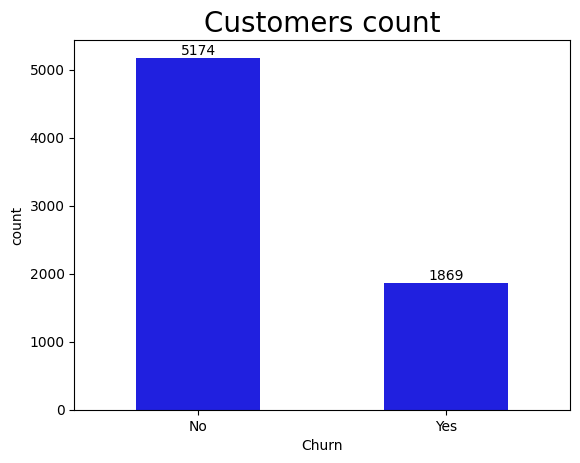

In [ ]:
ax= sns.countplot(x = "Churn", data = df, width= 0.5, color = "blue")
plt.title("Customers count", fontsize = "20")
ax.bar_label(ax.containers[0])
plt.show()

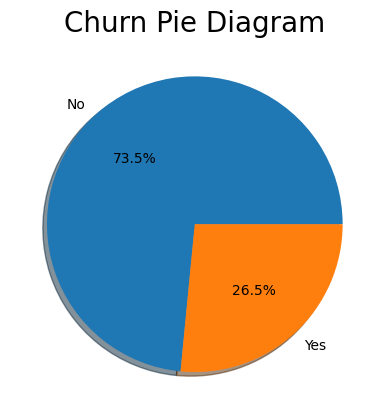

In [ ]:
#First we make an aggregate of the data that we want to show in the pie diagram

gb= df.groupby("Churn").agg({"Churn":"count"})

#Making a pie chart

myexplode = [0,0.2]
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.1f%%", shadow = "TRUE" )
plt.title("Churn Pie Diagram", fontsize = "20" )
plt.show()

In [ ]:
#Form the above data we get that 26.5% of our customers have churned out
#Now let's explore the reason behind it

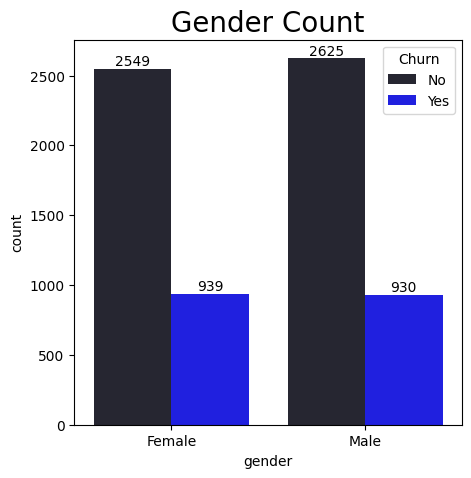

In [ ]:
plt.figure(figsize=(5,5))
gen = sns.countplot(data=df, x="gender", palette="dark:blue", hue = "Churn")
gen.bar_label(gen.containers[0])
gen.bar_label(gen.containers[1])
plt.title("Gender Count", fontsize = "20")
plt.show()

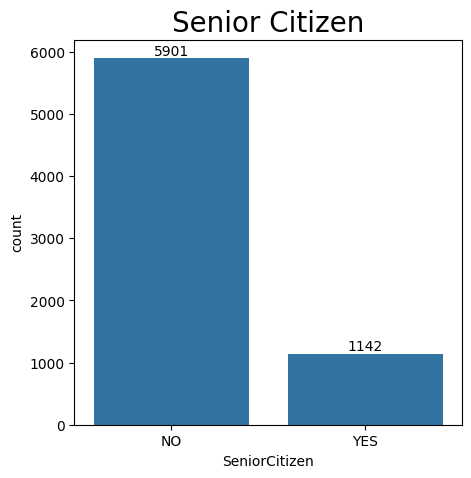

In [ ]:
#Data for Senior Citizen

plt.figure(figsize=(5,5))
gen = sns.countplot(data=df, x="SeniorCitizen")
gen.bar_label(gen.containers[0])
plt.title("Senior Citizen", fontsize = "20")
plt.show()

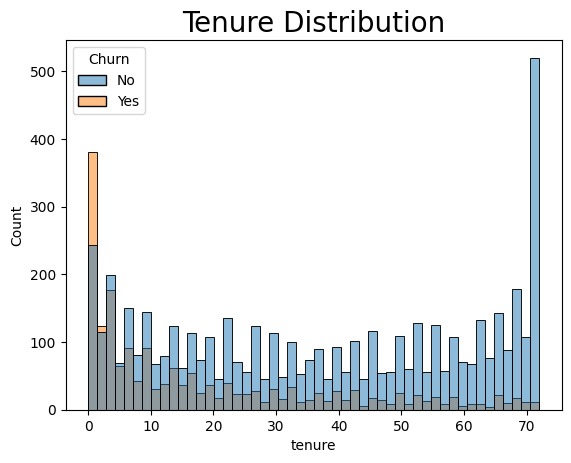

In [ ]:
sns.histplot(x="tenure", data=df, bins= 50, hue="Churn")
plt.title("Tenure Distribution", fontsize = "20")
plt.show()

In [ ]:
# People who have used our services for a long time have stayed, but people who have made short contract for 1 months average have churned out.

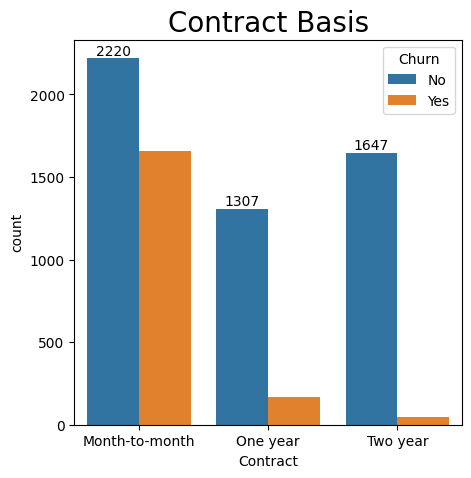

In [ ]:
plt.figure(figsize=(5,5))
gen = sns.countplot(data=df, x="Contract", hue="Churn")
gen.bar_label(gen.containers[0])
plt.title("Contract Basis", fontsize = "20")
plt.show()

People who have month-to-month contract are likely to churn than those who have one or two years of contract.

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

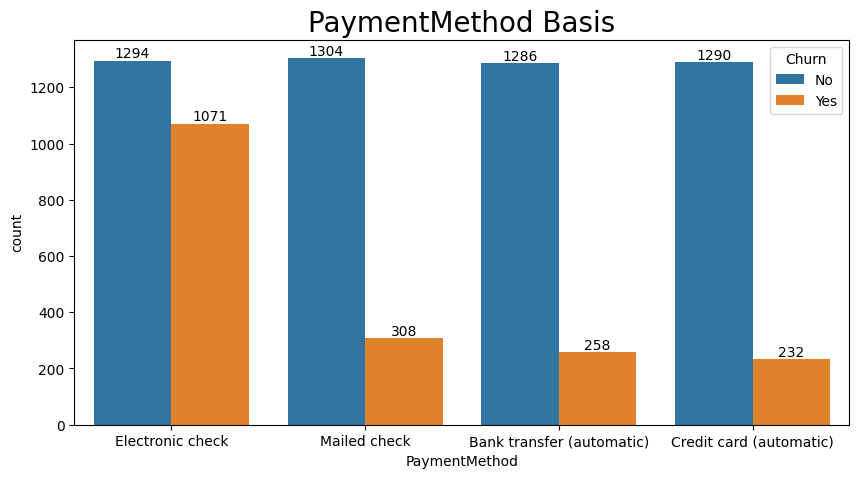

In [ ]:
plt.figure(figsize=(10,5))
gen = sns.countplot(data=df, x="PaymentMethod", hue="Churn")
gen.bar_label(gen.containers[0])
gen.bar_label(gen.containers[1])
plt.title("PaymentMethod Basis", fontsize = "20")
plt.show()

In [ ]:
#Customer is likely to churn out when he is using Electronic Check for payment.

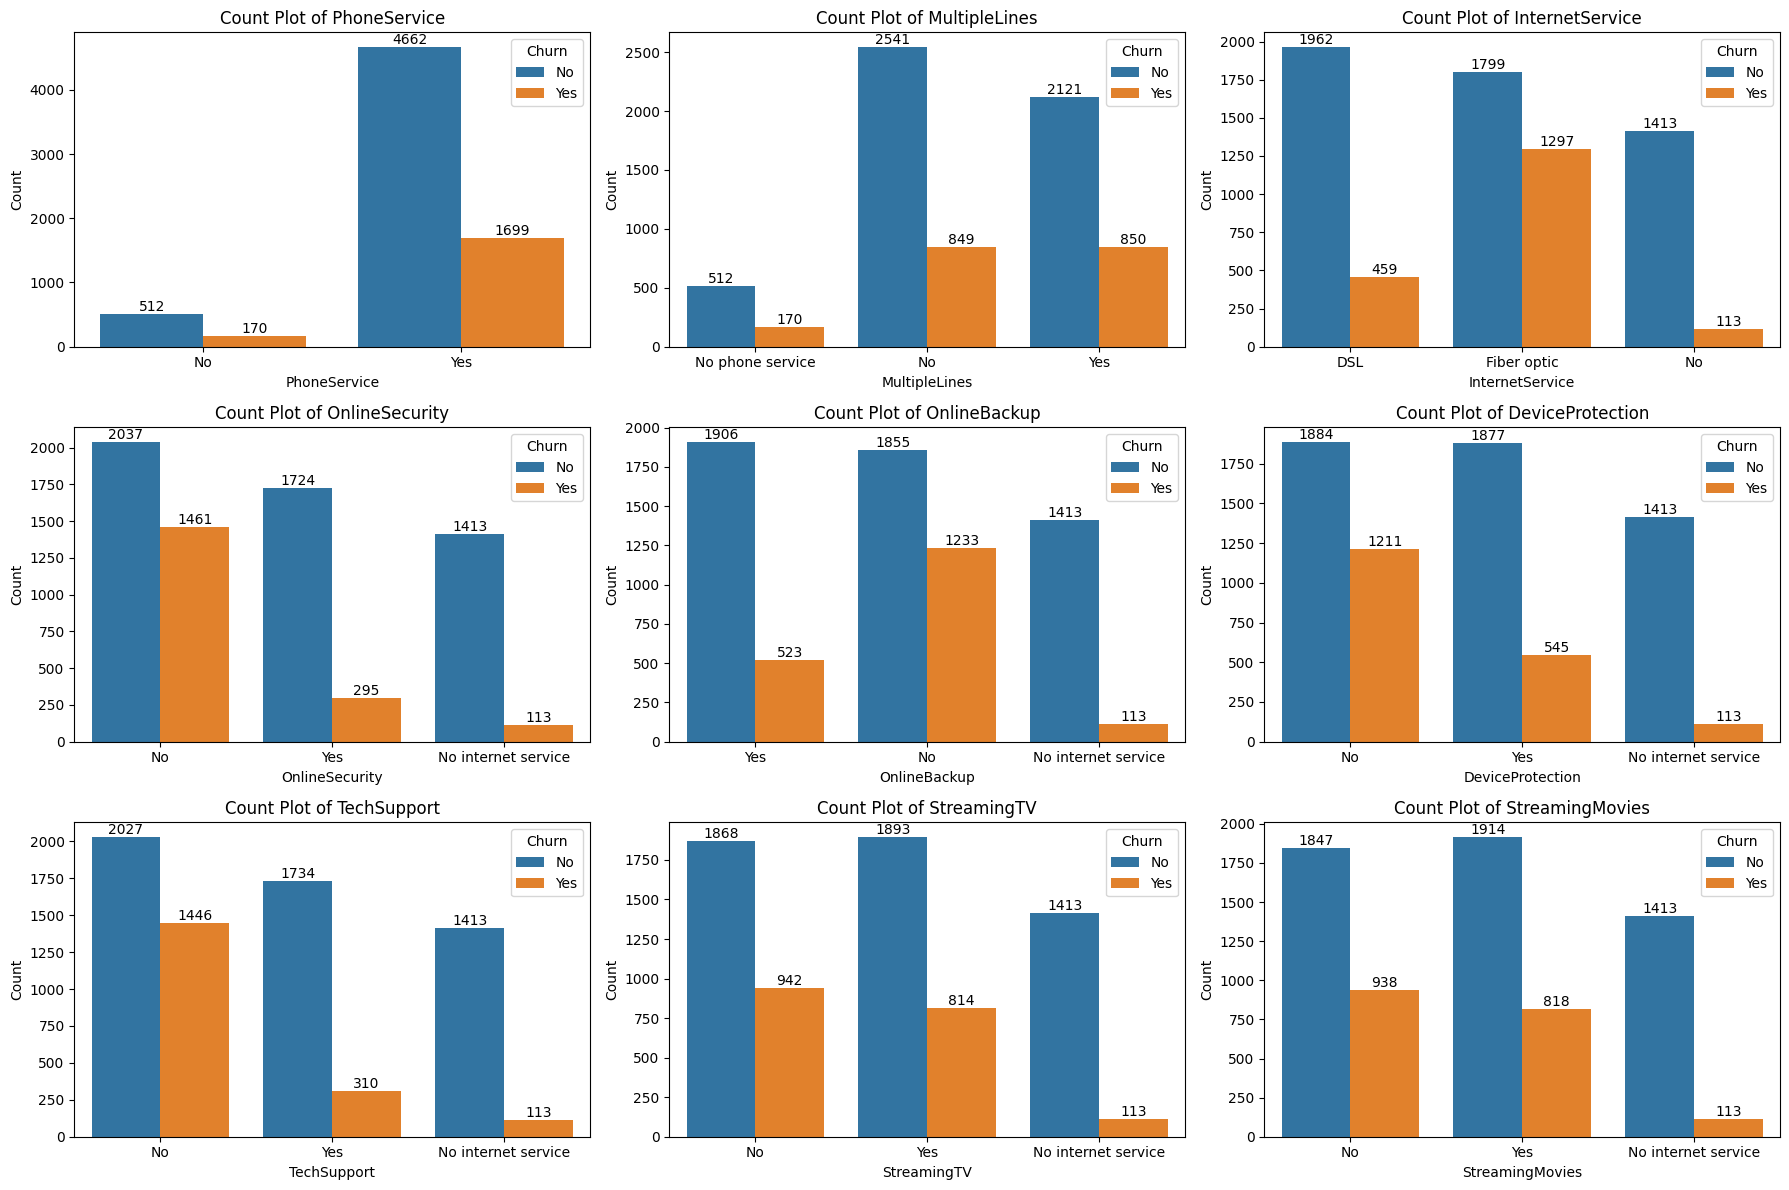

In [11]:
import math

columns = ('PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies')

# Set number of columns for subplot grid
n_cols = 3
n_rows = math.ceil(len(columns) / n_cols)  # use ceiling to include all columns

# Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # flatten in case of multiple rows

# Plot each categorical column
for i, column in enumerate(columns):
    asa = sns.countplot(x=column, data=df, hue='Churn', ax=axes[i])
    asa.bar_label(asa.containers[0])
    asa.bar_label(asa.containers[1])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Show Viusalization
plt.tight_layout()
plt.show()
